# **Исследование данных с информацией о сделках с недвижимостью в Москве**

**Цели дополнительного задания:**

*   обработать отсутствующие значения
*   обработать лишние значения
*   выявить аномалии
*   проверить сбалансированность данных
*   выяснить какие признаки наиболее влияют на целевую переменную
*   посчитать основные статистике по годам

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(csv_file_path)

**Посмотрим какие данные приведены в таблице**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


**Отбор столбцов с числовыми значениями**

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

**Отбор столбцов с нечисловыми значениями**

In [ ]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


**По возможности преобразуем данные в числовой тип**

In [ ]:
#преобразуем данные из нечисловых колонок в целочисленный тип данных
df['culture_objects_top_25']= df['culture_objects_top_25'].replace('no', '0')
df['culture_objects_top_25']= df['culture_objects_top_25'].replace('yes', '1')
df['culture_objects_top_25'] = df['culture_objects_top_25'].astype('int64')

df['thermal_power_plant_raion']= df['thermal_power_plant_raion'].replace('no', '0')
df['thermal_power_plant_raion']= df['thermal_power_plant_raion'].replace('yes', '1')
df['thermal_power_plant_raion'] = df['thermal_power_plant_raion'].astype('int64')

df['incineration_raion']= df['incineration_raion'].replace('no', '0')
df['incineration_raion']= df['incineration_raion'].replace('yes', '1')
df['incineration_raion'] = df['incineration_raion'].astype('int64')

df['oil_chemistry_raion']= df['oil_chemistry_raion'].replace('no', '0')
df['oil_chemistry_raion']= df['oil_chemistry_raion'].replace('yes', '1')
df['oil_chemistry_raion'] = df['oil_chemistry_raion'].astype('int64')

df['radiation_raion']= df['radiation_raion'].replace('no', '0')
df['radiation_raion']= df['radiation_raion'].replace('yes', '1')
df['radiation_raion'] = df['radiation_raion'].astype('int64')

df['railroad_terminal_raion']= df['railroad_terminal_raion'].replace('no', '0')
df['railroad_terminal_raion']= df['railroad_terminal_raion'].replace('yes', '1')
df['railroad_terminal_raion'] = df['railroad_terminal_raion'].astype('int64')

df['big_market_raion']= df['big_market_raion'].replace('no', '0')
df['big_market_raion']= df['big_market_raion'].replace('yes', '1')
df['big_market_raion'] = df['big_market_raion'].astype('int64')

df['nuclear_reactor_raion']= df['nuclear_reactor_raion'].replace('no', '0')
df['nuclear_reactor_raion']= df['nuclear_reactor_raion'].replace('yes', '1')
df['nuclear_reactor_raion'] = df['nuclear_reactor_raion'].astype('int64')

df['detention_facility_raion']= df['detention_facility_raion'].replace('no', '0')
df['detention_facility_raion']= df['detention_facility_raion'].replace('yes', '1')
df['detention_facility_raion'] = df['detention_facility_raion'].astype('int64')

df['water_1line']= df['water_1line'].replace('no', '0')
df['water_1line']= df['water_1line'].replace('yes', '1')
df['water_1line'] = df['water_1line'].astype('int64')

df['big_road1_1line']= df['big_road1_1line'].replace('no', '0')
df['big_road1_1line']= df['big_road1_1line'].replace('yes', '1')
df['big_road1_1line'] = df['big_road1_1line'].astype('int64')

df['railroad_1line']= df['railroad_1line'].replace('no', '0')
df['railroad_1line']= df['railroad_1line'].replace('yes', '1')
df['railroad_1line'] = df['railroad_1line'].astype('int64')

#преобразуем данные из нечисловых колонок во временной тип данных
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S')

**Просмотрим таблицу и проанализируем пропущенные и аномальные значения**

In [ ]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

**Проверка данных на пропущенные значения (пропуски обозначены желтым цветом)**

<Axes: >

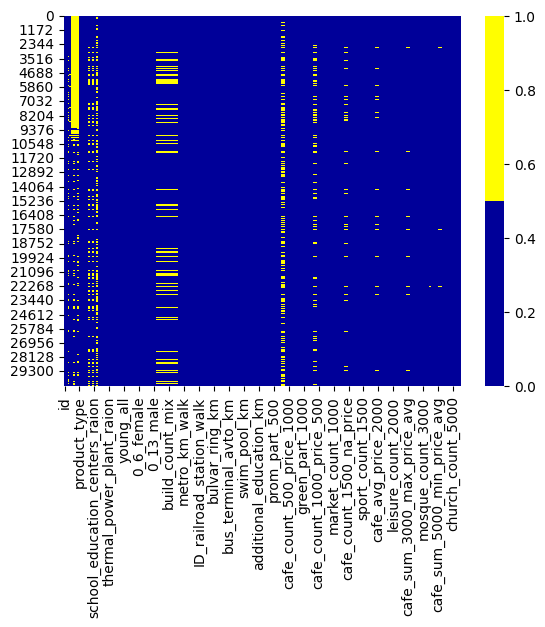

In [ ]:
cols = df.columns[:292]
colours = ['#000099', '#fffe00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

**График выбросов по столбцу life_sq**

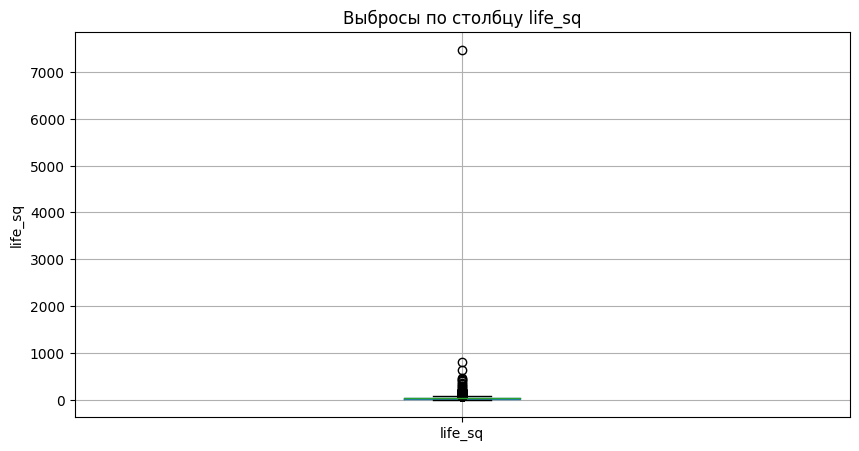

In [ ]:
df.boxplot('life_sq', figsize=(10,5))
plt.title('Выбросы по столбцу life_sq')
plt.ylabel('life_sq')
plt.xlabel('')
plt.show()

**График выбросов по столбцу state**

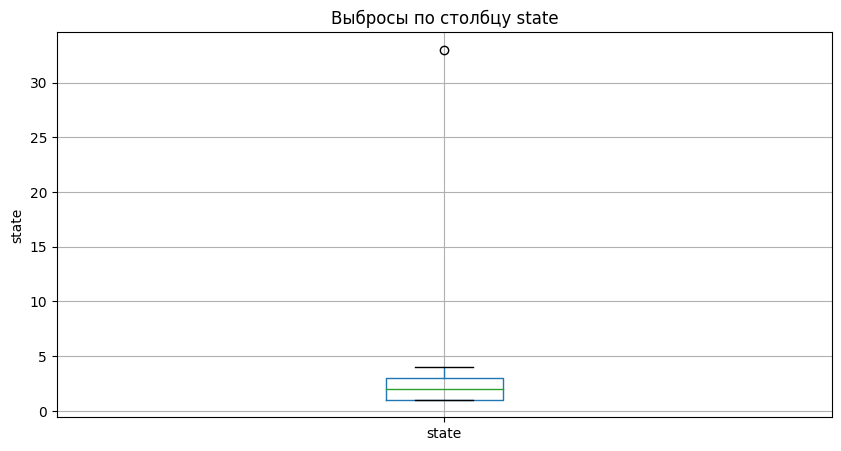

In [ ]:
df.boxplot('state', figsize=(10,5))
plt.title('Выбросы по столбцу state')
plt.ylabel('state')
plt.xlabel('')
plt.show()

**График выбросов по столбцу num_room**

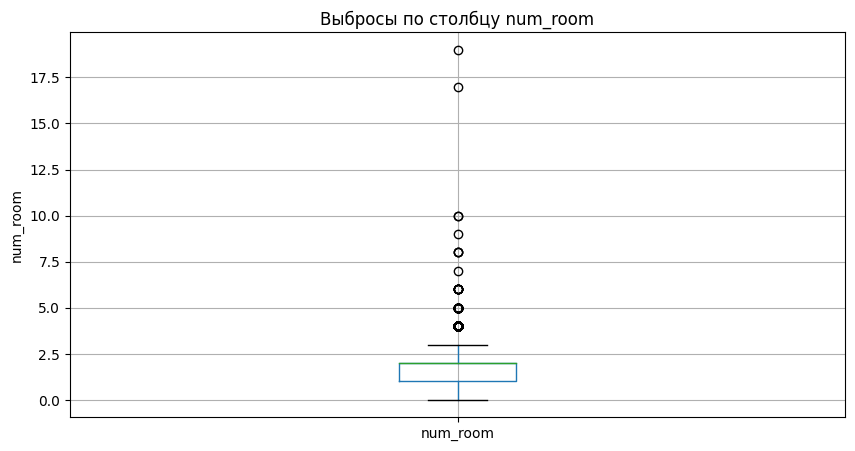

In [ ]:
df.boxplot('num_room', figsize=(10,5))
plt.title('Выбросы по столбцу num_room')
plt.ylabel('num_room')
plt.xlabel('')
plt.show()

**Удаление выбросов**

In [ ]:
df=df.query('life_sq<60')
df=df.query('state<30')
df=df.query('build_year>1920')
df=df.query('preschool_quota<7500')
df=df.query('hospital_beds_raion<3750')
df=df.query('cafe_sum_500_min_price_avg<1300')
df=df.query('num_room<4')
df=df.query('full_sq<80')
df=df.query('full_sq>20')
df=df.query('ID_railroad_station_walk<120')
df=df.query('metro_km_walk<20')

**График выбросов по столбцу life_sq после удаления выбросов**

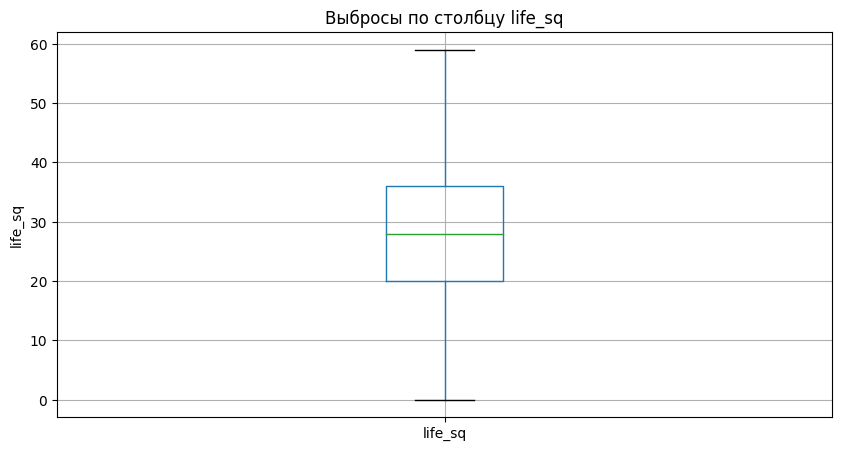

In [ ]:
df.boxplot('life_sq', figsize=(10,5))
plt.title('Выбросы по столбцу life_sq')
plt.ylabel('life_sq')
plt.xlabel('')
plt.show()

**График выбросов по столбцу state после удаления выбросов**

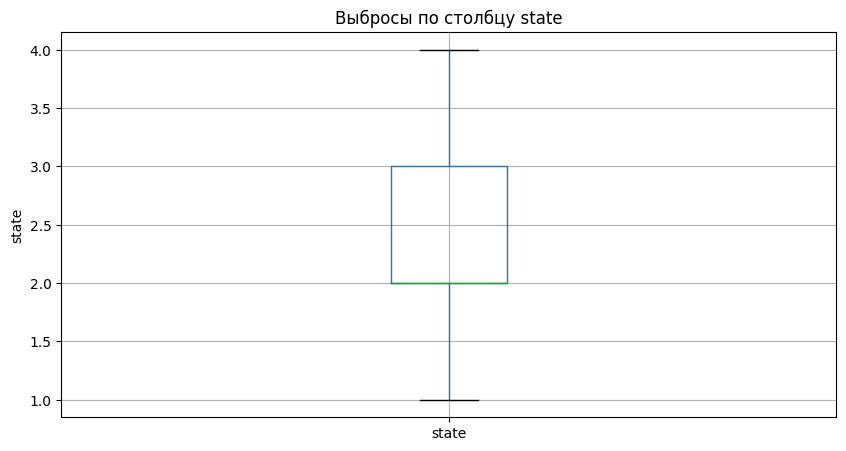

In [ ]:
df.boxplot('state', figsize=(10,5))
plt.title('Выбросы по столбцу state')
plt.ylabel('state')
plt.xlabel('')
plt.show()

**График выбросов по столбцу num_room после удаления выбросов**

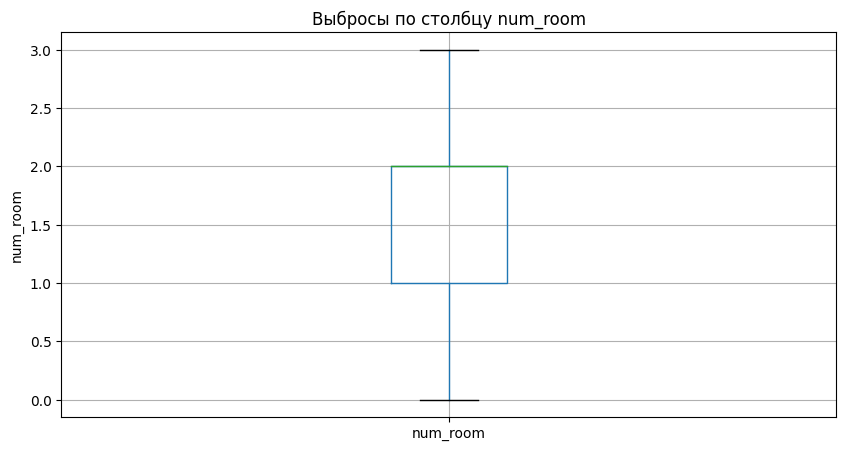

In [ ]:
df.boxplot('num_room', figsize=(10,5))
plt.title('Выбросы по столбцу num_room')
plt.ylabel('num_room')
plt.xlabel('')
plt.show()

**Проверка данных на пропущенные значения после их обработки**

In [ ]:
pd.DataFrame(df.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
price_doc,0.000000
ttk_km,0.000000
green_zone_km,0.000000
industrial_km,0.000000
water_treatment_km,0.000000
cemetery_km,0.000000
incineration_km,0.000000
railroad_station_walk_km,0.000000
railroad_station_walk_min,0.000000
ID_railroad_station_walk,0.000000


**Построим таблицу корреляции**

In [ ]:
pd.set_option('display.max_columns', None)
df.corr()

<ipython-input-106-c2592685dc60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na

**Влияние некоторых факторов на окончательную цену**

<Axes: >

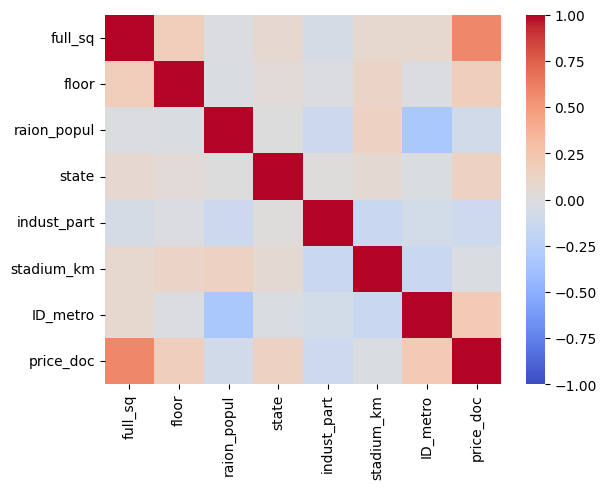

In [ ]:
df_new=df[['full_sq', 'floor', 'raion_popul', 'state', 'indust_part', 'stadium_km', 'ID_metro', 'price_doc']]
sns.heatmap(df_new.corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

**График зависимости цены на квартиру от её площади**

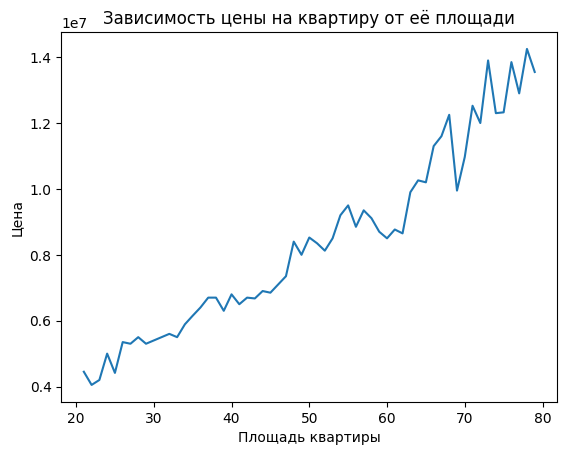

In [ ]:
df.groupby('full_sq')['price_doc'].median().plot()
plt.title('Зависимость цены на квартиру от её площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена')
plt.show()

**График зависмости цены на кваритру от количества комнат**

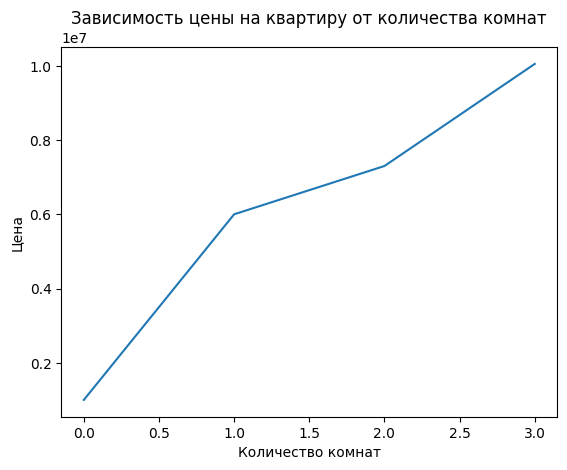

In [ ]:
df.groupby('num_room')['price_doc'].median().plot()
plt.title('Зависимость цены на квартиру от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

**График зависимости цены на кваритру от доли площади зеленых насаждений в общей площади**

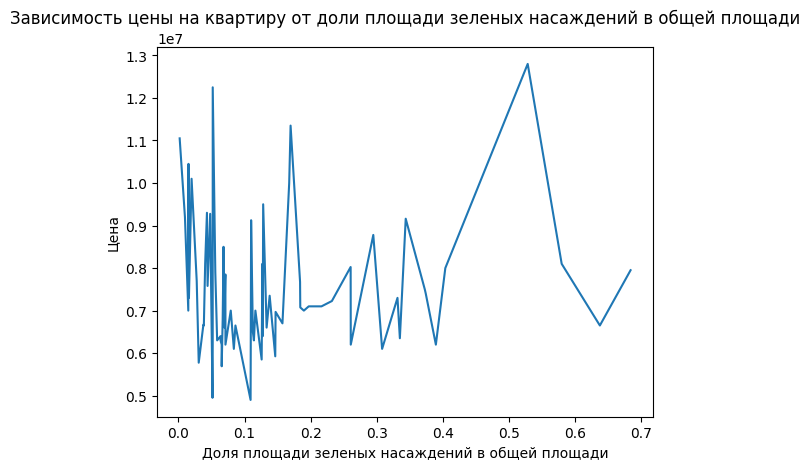

In [ ]:
df.groupby('green_zone_part')['price_doc'].median().plot()
plt.title('Зависимость цены на квартиру от доли площади зеленых насаждений в общей площади')
plt.xlabel('Доля площади зеленых насаждений в общей площади')
plt.ylabel('Цена')
plt.show()

**График зависимости цены на квартиру от расстояния до железнодорожного вокзала**

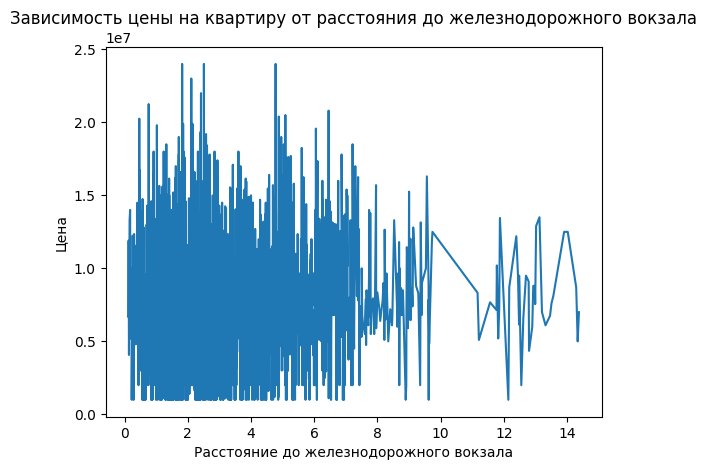

In [ ]:
df.groupby('railroad_station_walk_km')['price_doc'].median().plot()
plt.title('Зависимость цены на квартиру от расстояния до железнодорожного вокзала')
plt.xlabel('Расстояние до железнодорожного вокзала')
plt.ylabel('Цена')
plt.show()

**График зависимости цены на квартиру от расстояния до метро**

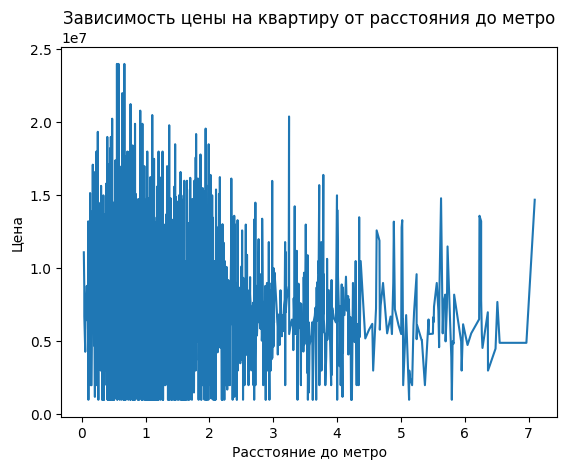

In [ ]:
df.groupby('metro_km_walk')['price_doc'].median().plot()
plt.title('Зависимость цены на квартиру от расстояния до метро')
plt.xlabel('Расстояние до метро')
plt.ylabel('Цена')
plt.show()

**Из данных графиков делаем вывод, что площадь квартиры и количество комнат влияют на окончательную цену квартиры в отличие от зеленых насаждений в общей площади, расстояния до железнодорожного вокзала и расстояния до метро**

**Проверим сбалансированность данных, которе наиболее влияют на окончательную цену**

2.0    0.437195
1.0    0.350866
3.0    0.211718
0.0    0.000222
Name: num_room, dtype: float64


Text(0.5, 1.0, '')

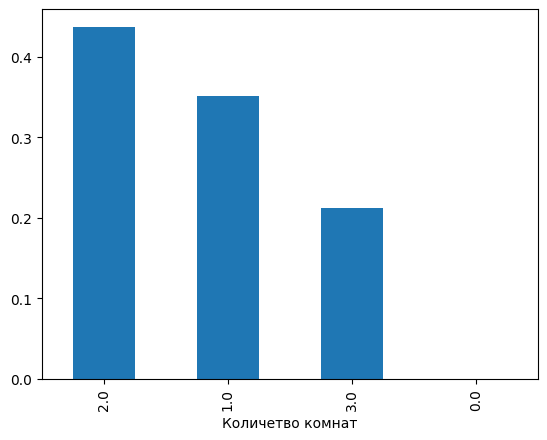

In [ ]:
class_frequency  =  df['num_room'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar')
plt.xlabel('Количетво комнат')
plt.ylabel('')
plt.title('')

**На графике видно, что баланс данных нарушен. Двухкомнатных квартир значительно больше, чем трехкомнатных**

2.0     0.122503
5.0     0.119840
3.0     0.119840
4.0     0.100089
1.0     0.083666
7.0     0.063915
9.0     0.062139
8.0     0.061252
6.0     0.057257
12.0    0.033289
11.0    0.031514
10.0    0.030404
14.0    0.025743
13.0    0.022636
16.0    0.017088
15.0    0.017088
17.0    0.010652
19.0    0.005104
18.0    0.003773
22.0    0.003107
21.0    0.002441
20.0    0.002219
24.0    0.001332
25.0    0.000666
23.0    0.000444
30.0    0.000222
36.0    0.000222
26.0    0.000222
32.0    0.000222
41.0    0.000222
77.0    0.000222
29.0    0.000222
34.0    0.000222
44.0    0.000222
Name: floor, dtype: float64


Text(0.5, 1.0, '')

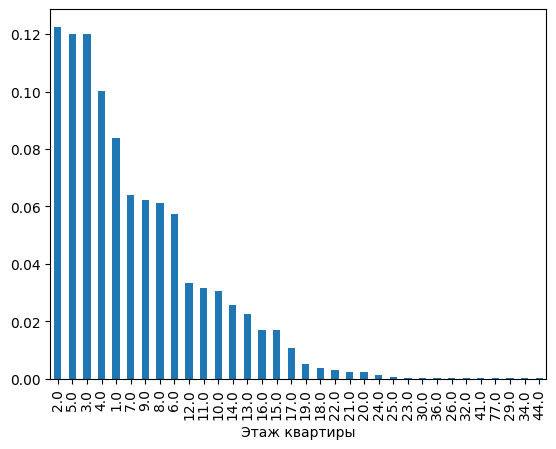

In [ ]:
class_frequency  =  df['floor'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar')
plt.xlabel('Этаж квартиры')
plt.ylabel('')
plt.title('')

**Динамику цен на жильё можно посмотреть по годам и месяцам**

In [ ]:
df["year"] = df["timestamp"].dt.to_period("Y")
df["month"] = df["timestamp"].dt.to_period("M")

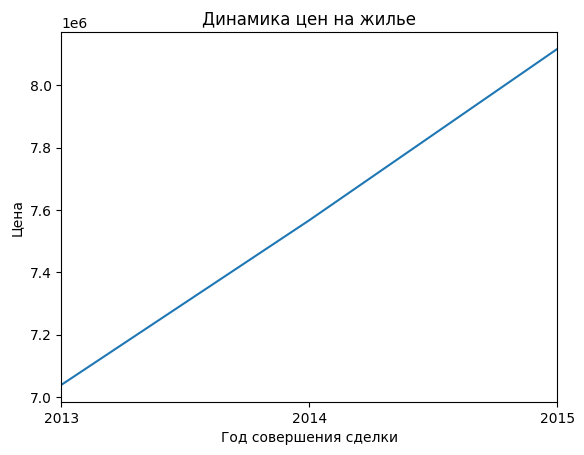

In [ ]:
df.groupby('year')['price_doc'].mean().plot()
plt.title('Динамика цен на жилье')
plt.xlabel('Год совершения сделки')
plt.ylabel('Цена')
plt.show()

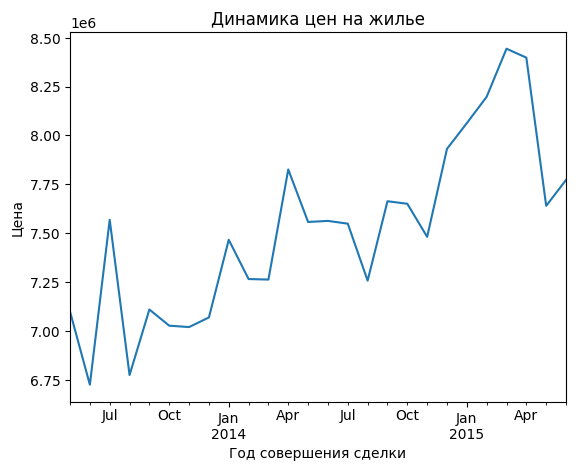

In [ ]:
df.groupby('month')['price_doc'].mean().plot()
plt.title('Динамика цен на жилье')
plt.xlabel('Год совершения сделки')
plt.ylabel('Цена')
plt.show()

**Проанализировав таблицу корреляции и построив графики, мы поняли что наибольшее влияние на цену квартиры оказывает площадь и количество комнат. Также мы видим, что цена на квартиры увеличивается с каждым годом.**

# **Общий вывод проведенного исследования**

**В ходе задания мы провели исследование данных о сделках с недвижимостью в Москве:**

*   преобразовали некоторые столбцы в числовой тип данных для дальнейшей работы
*   удалили отсутствующие значения
*   выявили аномальные значения и удалили их
*   проверили сбалансированность данных и поняли, что присуствует дисбаланс, это плохо, т. к. при обучении моделей меньший класс будет хуже предсказываться
*   с помощью таблицы корреляции выяснили какие признаки наиболее влияют на целевую переменную (площадь квартиры, количество комнат), а какие не влияют (доля площади зеленых насаждений в общей площади, расстояние до железнодорожного вокзала, расстояние до метро)
*   проанализировали динамику цен на квартиры по годам и месяцам